# Unsupervised Machine Learning

Giving the algorithm data and trying to get it to cluster the data into groups without providing it with any labels. You can try to get the computer to identify these patterns by itself or you can ask it to separate the data into a certain number of groups.

- Flat Unsupervised Learning: Separate data into known number of groups
- Hierarchical Clustering: Allow algorithm to determine how many clusters it should identify

Unsupervised Machine Learning can be used to:
- Identify groups in the data when we don't know much about it
- Understand differences between groups we do know about
- Simplify a dataset so we can understand and visualise it: Identify which features are important

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

# more than 10k samples, may want to use kmeans mini-batch
from sklearn.cluster import KMeans

## Flat Clustering: K Means

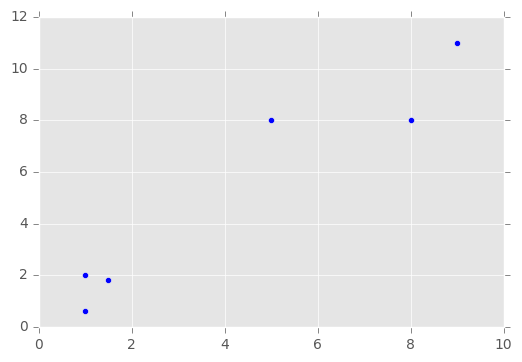

In [3]:
x = [1, 5, 1.5, 8, 1, 9]
y = [2, 8, 1.8, 8, 0.6, 11]

plt.figure()
plt.scatter(x,y)
plt.show()

In [6]:
X = np.array([  [1, 2],
                [5, 8],
                [1.5, 1.8],
                [8, 8],
                [1, 0.6],
                [9, 11]])

kmeans = KMeans(n_clusters=2)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

[[ 7.33333333  9.        ]
 [ 1.16666667  1.46666667]]
[1 0 1 0 1 0]
coordinate: [ 1.  2.] label: 1
coordinate: [ 5.  8.] label: 0
coordinate: [ 1.5  1.8] label: 1
coordinate: [ 8.  8.] label: 0
coordinate: [ 1.   0.6] label: 1
coordinate: [  9.  11.] label: 0


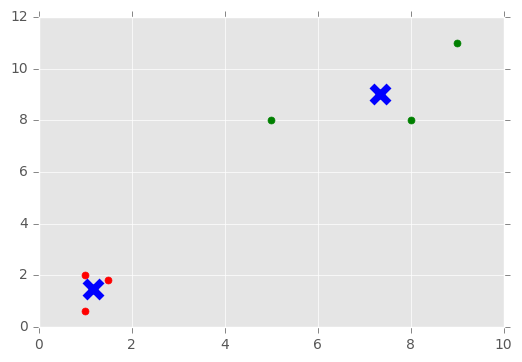

In [9]:
centroids = kmeans.cluster_centers_
labels = kmeans.labels_

print(centroids)
print(labels)

colors = ["g.","r.","c.","y."]
plt.figure()
for i in range(len(X)):
    print("coordinate:",X[i], "label:", labels[i])
    plt.plot(X[i][0], X[i][1], colors[labels[i]], markersize = 10)

plt.scatter(centroids[:, 0],centroids[:, 1], marker = "x", s=150, linewidths = 5, zorder = 10)
plt.show()

## Hierarchical Clustering: Mean Shift
Mean shift algorithm requires a fair few more exaples of the data than k-means so we'll use sklearn's make_blobs functionality. It will make blobs of data around a point that you specify - you say how many blobs you want and their randomness and standard deviation. It will generate sample data that will come with labels.

Mean shift is accurate up to 10,000 samples, but after that it stops working as well and you'll need to simplify things.

In [11]:
import numpy as np
from sklearn.cluster import MeanShift
from sklearn.datasets.samples_generator import make_blobs
import matplotlib.pyplot as plt
from matplotlib import style
style.use("ggplot")

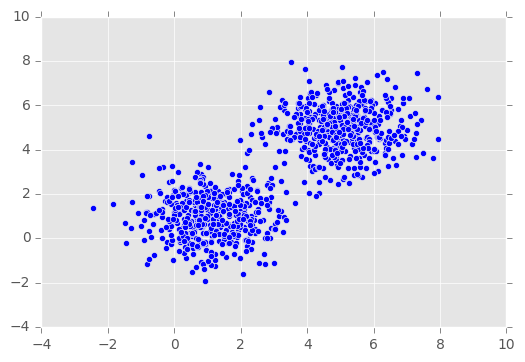

In [18]:
centers = [[1,1], [5,5]]
X, y = make_blobs(n_samples = 1000, centers = centers, cluster_std = 1)

plt.figure()
plt.scatter(X[:,0], X[:,1])
plt.show()

In [19]:
ms = MeanShift()
ms.fit(X)
labels = ms.labels_
cluster_centers = ms.cluster_centers_

In [20]:
print(cluster_centers)
n_clusters_ = len(np.unique(labels))
print("Number of estimated clusters:", n_clusters_)

[[ 1.11525296  0.97486039]
 [ 4.9670171   4.9680141 ]]
Number of estimated clusters: 2


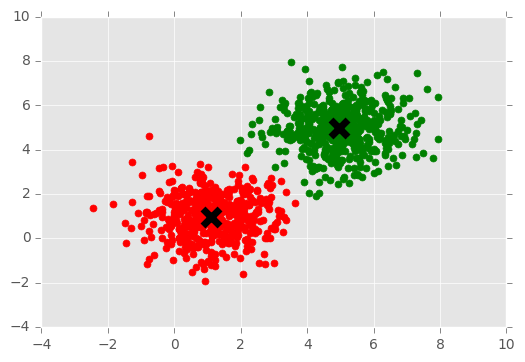

In [21]:
colors = 10*['r.','g.','b.','c.','k.','y.','m.']

plt.figure()
for i in range(len(X)):
    plt.plot(X[i][0], X[i][1], colors[labels[i]], markersize = 10)

plt.scatter(cluster_centers[:,0],cluster_centers[:,1],
            marker="x",color='k', s=150, linewidths = 5, zorder=10)

plt.show()